Avaliação de Modelos parte I Random Forest

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
import matplotlib.pyplot as plt 

Realizando a importação do arquivo

In [17]:
#dados de concessão de crédito
credito = pd.read_csv('Credit3.csv', sep=";")
credito.head()

,ID,checking_status,credit_history,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,class
0,1,<0,critical/other existing credit,6,1169,4,4,67,2,1,1
1,2,0<=X<200,existing paid,48,5951,2,2,22,1,1,0
2,3,no checking,critical/other existing credit,12,2096,2,3,49,1,2,1
3,4,<0,existing paid,42,7882,2,4,45,1,2,1
4,5,<0,delayed previously,24,4870,3,4,53,2,2,0


In [18]:
#contamos a classe
credito.groupby(['class'])['class'].count()

class
0    300
1    700
Name: class, dtype: int64

In [19]:
#separação de previsões de classe
previsores = credito.iloc[:,1:10].values
classe = credito.iloc[:,10].values
previsores

array([['<0', 'critical/other existing credit', 6, ..., 67, 2, 1],
       ['0<=X<200', 'existing paid', 48, ..., 22, 1, 1],
       ['no checking', 'critical/other existing credit', 12, ..., 49, 1,
        2],
       ...,
       ['no checking', 'existing paid', 12, ..., 38, 1, 1],
       ['<0', 'existing paid', 45, ..., 23, 1, 1],
       ['0<=X<200', 'critical/other existing credit', 45, ..., 27, 1, 1]],
      dtype=object)

In [20]:
#label encoding de atributos categóricos
#fazemos isso pq agora a coluna 0 se tornou a coluna checking_status e a 1 credit_history, então passamos ela para númerica
labelencoder = LabelEncoder()
previsores[:,0] = labelencoder.fit_transform(previsores[:,0])
previsores[:,1] = labelencoder.fit_transform(previsores[:,1])

In [21]:
#separamos em treino e teste
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(previsores,
                                                                  classe,
                                                                  test_size = 0.3,
                                                                  random_state = 123)

In [22]:
print(X_teste)

[[1 2 36 ... 29 1 1]
 [1 3 12 ... 21 1 1]
 [0 2 24 ... 29 1 1]
 ...
 [1 3 6 ... 27 1 1]
 [1 1 9 ... 36 2 2]
 [3 3 12 ... 31 2 2]]


In [23]:
print(y_teste)

[0 0 1 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0
 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0
 1 1 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1
 0 0 0 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 1]


In [24]:
#objeto randomforest
modelorf = RandomForestClassifier(n_estimators = 100)
#treinamento
modelorf.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [25]:
#previsão e matriz de confusão
previsoes_rf = modelorf.predict(X_teste)
confusao = confusion_matrix(y_teste, previsoes_rf)
confusao

array([[ 44,  56],
       [ 20, 180]], dtype=int64)

In [ ]:
#matriz de confusão "visual"
plot_confusion_matrix(modelorf, X_teste, y_teste)

In [14]:
#acuracia
acuracia = accuracy_score(y_teste, previsoes_rf)
print(acuracia)

0.75


In [15]:
#erro
erro = 1 - acuracia
print(erro)

0.25


In [16]:
#recall, ele nos diz de todos os bons pagadores de creditos, quantos foram classificados corretamente como bom
recall = recall_score(y_teste, previsoes_rf) 
print(recall)

0.915


In [17]:
#precision, ele nos mostra dos que classificamos como bom, quantos de fato eram bons
precision = precision_score(y_teste, previsoes_rf) 
print(precision)

0.7593360995850622


In [18]:
#f1, é uma media armonica entre precision e recall, o valor entre 0 a 1, o objetivo é maximizar ele
f1 = f1_score(y_teste, previsoes_rf) 
print(f1)

0.8299319727891156


In [19]:
#area under curve
auc = roc_auc_score(y_teste, previsoes_rf) 
auc

0.6675

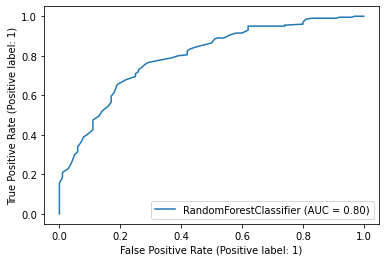

In [20]:
#plot roc
plot_roc_curve(modelorf, X_teste, y_teste) 

In [21]:
#log, usado principalmente qdo tem multiplas classe, ele penaliza o erro, objetivo de minimizar 
log = log_loss(y_teste, previsoes_rf) 
log

8.634848687564174